In [11]:
import pandas as pd
import os
import gc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVR

In [12]:
def plt_plot(y_real,y_predicted):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(range(len(y_real)),y_real, color='g')
    ax.plot(range(len(y_predicted)),y_predicted,color='r')
    plt.show()
def Error_compute(y_real,y_predicted):
    y_diff=y_real-y_predicted
    diff_positive=y_diff[y_diff>0]
    diff_negitive_0=y_diff[y_diff<=0]
    if diff_negitive_0.shape[0] >0:
        sum_negitive_error=sum(np.exp(-np.log(0.5)*(diff_negitive_0/5)))
    else:
        sum_negitive_error=0
    if diff_positive.shape[0] >0:
        sum_positive_error=sum(np.exp(np.log(0.5)*(diff_positive/20)))
    else:
        sum_positive_error=0
    return (sum_negitive_error+sum_positive_error)/len(y_real)

In [13]:
source_dire="feature"

In [186]:
columns_list=['v1_absmean', 'v2_absmean', 'v3_absmean', 'v1_absmedia', 'v2_absmedia',
              'v3_absmedia', 'v1_absrange', 'v2_absrange', 'v3_absrange', 'v1_absstdn', 
              'v2_absstdn', 'v3_absstdn', 'v1_absvar', 'v2_absvar', 'v3_absvar',
              'v1_maxvalue', 'v2_maxvalue', 'v3_maxvalue', 'v1_absmax', 'v2_absmax',
              'v3_absmax', 'v1_minvalue', 'v2_minvalue', 'v3_minvalue', 'v1_absmin', 
              'v2_absmin', 'v3_absmin', 'tool_age', 'residual_life', 'v1_1min_mean', 
              'v2_1min_mean', 'v3_1min_mean', 'v1_1min_var', 'v2_1min_var', 'v3_1min_var',
              'v1_1min_range', 'v2_1min_range', 'v3_1min_range', 'mean_spindel', 'var_spindel',
              'range_spindel']

In [19]:
df_train=pd.DataFrame([])
df_validation=pd.DataFrame([])
df_final=pd.DataFrame([])
for i in range(1,6):    
    df_temp=pd.read_csv(os.path.join(source_dire,"test_"+str(i)+"_feature.csv"))
#     df_validation=df_validation.append(df_temp[columns_list])
    df_validation=df_validation.append(df_temp)
for i in range(1,4):    
    df_temp=pd.read_csv(os.path.join(source_dire,"train_"+str(i)+"_feature.csv"))
#     df_train=df_train.append(df_temp[columns_list])
    df_train=df_train.append(df_temp)
for i in range(1,5):    
    df_temp=pd.read_csv(os.path.join(source_dire,"final_"+str(i)+"_feature.csv"))
#     df_final=df_final.append(df_temp[columns_list])
    df_final=df_final.append(df_temp)
train_label=df_train["residual_life"].values
df_train.drop('residual_life',axis=1,inplace=True)
train_data=df_train.values

valid_label=df_validation["residual_life"].values
df_validation.drop('residual_life',axis=1,inplace=True)
valid_data=df_validation.values

final_label=df_final["residual_life"].values
df_final.drop('residual_life',axis=1,inplace=True)
final_data=df_final.values
gc.collect()

min_max_scaler = preprocessing.MinMaxScaler()
train_data = min_max_scaler.fit_transform(train_data)
valid_data = min_max_scaler.fit_transform(valid_data)
final_data = min_max_scaler.fit_transform(final_data)
print(train_data.shape,train_label.shape,valid_data.shape,valid_label.shape)
print(final_data.shape,final_label.shape)

(7980, 52) (7980,) (3000, 52) (3000,)
(2400, 52) (2400,)


In [20]:
clf=SVR()
print(clf)
clf.fit(train_data, train_label)
print("fit finished")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
fit finished


real
108.0     88.302638
103.0    105.996565
98.0      99.795476
93.0      94.605579
88.0      98.820597
83.0      85.480623
78.0      89.706669
73.0      85.577135
68.0      75.167786
63.0      71.488972
Name: predicted, dtype: float64
[38.302638027023633, 60.99656450210729, 59.795475784703314, 59.60557860478734, 68.820597154741492, 60.480623245381068, 69.706668572448692, 70.577134573268808, 65.16778619010357, 66.48897234865214]
min 38.302638027
mean 61.9942039003


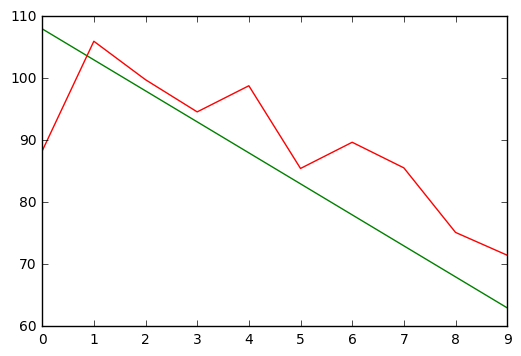

In [49]:
######################################
#  final
######################################
min_10=600
index=4
y_predicted=clf.predict(final_data[min_10*(index-1):min_10*index])

df_result=pd.DataFrame({"real":final_label[min_10*(index-1):min_10*index],"predicted":y_predicted})
df_predict=df_result["predicted"].groupby(df_result['real']).mean()
df_predict=df_predict.sort_index(ascending=False)

print(df_predict)
temp_list=[]
for index,temp in zip(range(0,10),df_predict):
    temp_list.append(temp-(5*(10-index)))
print(temp_list)
print("min",min(temp_list))
print("mean",np.mean(temp_list))
plt_plot(df_predict.index,df_predict)

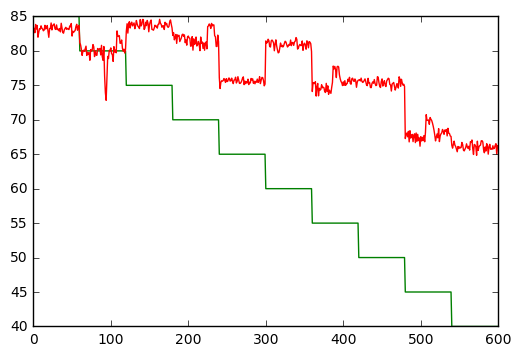

0.28666962022


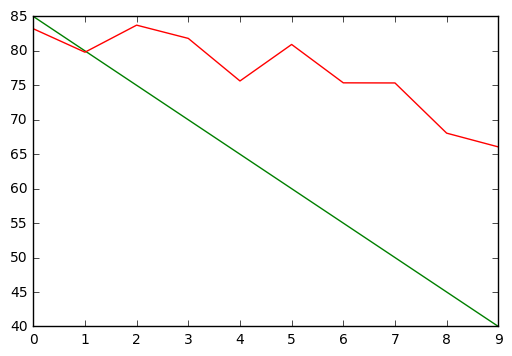

In [36]:
######################################
#  test
######################################
min_10=600
index=5
y_predicted=clf.predict(valid_data[min_10*(index-1):min_10*index])

df_result=pd.DataFrame({"real":valid_label[min_10*(index-1):min_10*index],"predicted":y_predicted})
plt_plot(valid_label[min_10*(index-1):min_10*index],y_predicted)

df_predict=df_result["predicted"].groupby(df_result['real']).mean()
# df_predict=df_predict-20
df_predict=df_predict.sort_index(ascending=False)
err=Error_compute(df_predict.index,df_predict)
print(err)
plt_plot(df_predict.index,df_predict)

In [37]:
print(df_predict)
temp_list=[]
for index,temp in zip(range(0,10),df_predict):
    temp_list.append(temp-(5*(10-index)))
print(temp_list)
print(min(temp_list))
print(np.mean(temp_list))


real
85.0    83.212537
80.0    79.810267
75.0    83.736230
70.0    81.811444
65.0    75.634145
60.0    80.933029
55.0    75.362658
50.0    75.345452
45.0    68.059504
40.0    66.062635
Name: predicted, dtype: float64
[33.212536536889715, 34.810266760798783, 43.73623044212323, 46.811444252482076, 45.634144823084426, 55.933028609490762, 55.362658043952152, 60.345451969198976, 58.059504472837816, 61.062635058956801]
33.2125365369
49.496790097


In [38]:
real_array=np.array([104,52,190,66,40])
predicted_array=np.array([76,56,78,59,33])
print(Error_compute(real_array,predicted_array))

0.508612765205
